In [1]:
import yfinance as yf 
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import numpy as np
from ta import add_all_ta_features

stock = 'SPY'
stock_df = yf.Ticker(stock).history(period="7d", interval = "1m")
df = stock_df.copy()
df.drop(columns = ['Dividends', 'Stock Splits', 'Capital Gains'], inplace = True)

In [42]:
# Index format
df.index = [str(x)[:-6] for x in df.index]
df.index = pd.to_datetime(df.index)
df.index.name = 'Date'

# df[df.diff().sum(axis = 1) > 0]

,Open,High,Low,Close,Volume
Date,,,,,
2023-06-29 09:00:00,436.130005,436.391998,436.119995,436.369995,428268
2023-06-29 09:00:00,436.730011,436.949890,436.679993,436.880005,250259
2023-06-29 09:00:00,436.869995,436.899994,436.690002,436.809998,229650
2023-06-29 09:00:00,436.755005,436.804993,436.369995,436.399994,222062
2023-06-29 09:00:00,436.399994,436.524994,436.230011,436.255005,251526
...,...,...,...,...,...
2023-07-10 15:00:00,439.059998,439.220001,439.040009,439.130005,941095
2023-07-10 15:00:00,439.195007,439.260010,439.059998,439.075012,477080
2023-07-10 15:00:00,439.075012,439.160004,439.040009,439.125000,652080


<AxesSubplot:xlabel='Date'>

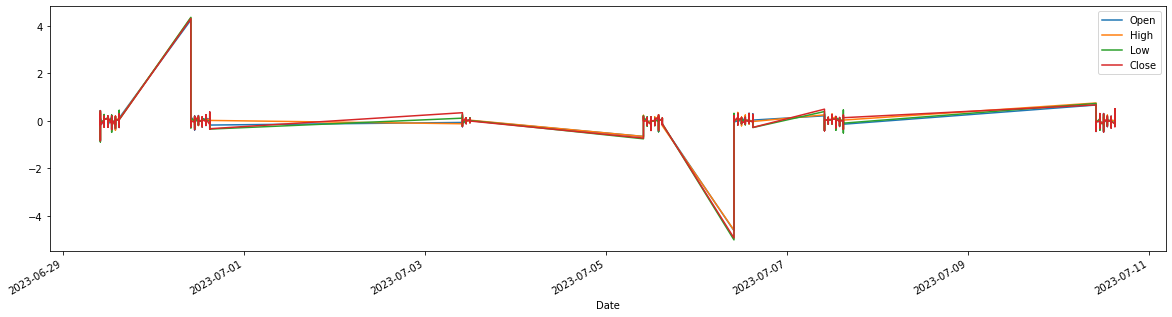

In [54]:
pdf = df.drop(columns = ['Volume']).copy()
#pdf = pdf.resample('1min').last().fillna(method = 'ffill')
#pdf = pdf[pdf.diff().sum(axis = 1) != 0]
pdf.between_time('9:30', '16:00').diff().plot(figsize = (20,5))




In [21]:

# PCA 
X = pdf.to_numpy()

def PCA(X, k):
    mu = np.mean(X, axis=1)[:, None]
    X_centered = X
    C = np.dot(X_centered, X_centered.T) / X.shape[0]
    S, W = np.linalg.eig(C)
    S = S.real; W = W.real
    idx = S.argsort()[::-1]
    S = S[idx]; W = W[:, idx]
    dim1 = np.dot(W[:, 0].T, X_centered)
    dim2 = np.dot(W[:, 1].T, X_centered)
    return S, W, dim1, dim2

S, W, dim1, dim2 = PCA(X, 3)

pdf.shape, W.shape, S.shape,

((41, 5), (41, 41), (41,))